## Comparison of Algorithms on Knapsack Problem

In [56]:
import timeit

import matplotlib.pyplot as plt
import mlrose_hiive as mlrose
import numpy as np

# Control random state and iterations
STATE = 1
ITER = 100


In [57]:
weights = list(np.random.randint(low=1, high=1001, size=1000)) # A thousand random numbers between 1-1000
values = np.arange(1,1001) # 1-1001
max_weight_pct = 1

In [58]:
print("Total value: ", np.sum(values))
print("Total weight: ", np.sum(weights))

Total value:  500500
Total weight:  502271


In [59]:
# Initialize fitness function object using defined parameters
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
# Create optimization problem object
rhc_problem = mlrose.DiscreteOpt(
    length=len(values),
    fitness_fn=fitness,
    maximize=True,
    max_val=2,
)
# Solve using randomized hill climbing
rhc_start = timeit.default_timer()
rhc_best_state, rhc_best_fitness, rhc_fitness = mlrose.random_hill_climb(
    rhc_problem,
    max_attempts=500,
    max_iters=ITER,
    restarts=0,
    init_state=None,
    curve=True,
    random_state=STATE,
)
rhc_stop = timeit.default_timer()
rhc_time = rhc_stop - rhc_start

# print("Time: ", rhc_stop - rhc_start)
# print("The best state found for RHC is: ", rhc_best_state)
# print("The fitness for RHC at the best state is: ", rhc_best_fitness)
# print("Fitness curve looks like: ", rhc_fitness)


In [60]:
# Initialize fitness function object using defined parameters
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
# Create optimization problem object
ga_problem = mlrose.DiscreteOpt(
    length=len(values),
    fitness_fn=fitness,
    maximize=True,
    max_val=2,
)
# Solve using simulated genetic algorithm
ga_start = timeit.default_timer()
ga_best_state, ga_best_fitness, ga_fitness = mlrose.genetic_alg(
    ga_problem, curve=True, max_iters=ITER, random_state=STATE
)
ga_stop = timeit.default_timer()
ga_time = ga_stop - ga_start

# print("Time: ", ga_stop - ga_start)
# print("The best state found for GA is: ", ga_best_state)
# print("The fitness for GA at the best state is: ", ga_best_fitness)
# print("Fitness curve looks like: ", ga_fitness)


In [61]:
# Initialize fitness function object using defined parameters
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
# Create optimization problem object
sa_problem = mlrose.DiscreteOpt(
    length=len(values),
    fitness_fn=fitness,
    maximize=True,
    max_val=2,
)
# Solve using simulated annealing
# Define decay schedule
schedule = mlrose.ExpDecay()

sa_start = timeit.default_timer()
sa_best_state, sa_best_fitness, sa_fitness = mlrose.simulated_annealing(
    sa_problem,
    schedule=schedule,
    max_attempts=50,
    max_iters=ITER,
    curve=True,
    random_state=STATE,
)
sa_stop = timeit.default_timer()
sa_time = sa_stop - sa_start

# print("Time: ", sa_stop - sa_start)
# print("The best state found for SA is: ", sa_best_state)
# print("The fitness for SA at the best state is: ", sa_best_fitness)
# print("Fitness curve looks like: ", sa_fitness)


In [62]:
# Initialize fitness function object using defined parameters
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
# Create optimization problem object
m_problem = mlrose.DiscreteOpt(
    length=len(values),
    fitness_fn=fitness,
    maximize=True,
    max_val=2,
)
m_problem.set_mimic_fast_mode(True)
# Solve using MIMIC
m_start = timeit.default_timer()
m_best_state, m_best_fitness, m_fitness = mlrose.mimic(
    m_problem,
    pop_size=500,
    keep_pct=0.2,
    max_attempts=10,
    max_iters=ITER,
    curve=True,
    random_state=STATE,
)
m_stop = timeit.default_timer()
m_time = m_stop - m_start

# print("Time: ", m_stop - m_start)
# print("The best state found for MIMIC is: ", m_best_state)
# print("The fitness for MIMIC at the best state is: ", m_best_fitness)
# print("Fitness curve looks like: ", m_fitness)


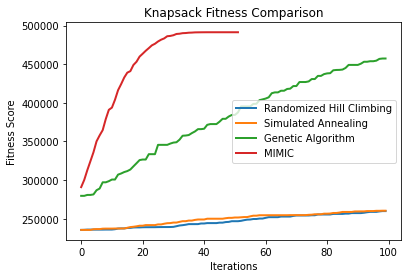

In [64]:
# Plot fitness over iterations
algorithms = [
    ("Randomized Hill Climbing", rhc_fitness),
    ("Simulated Annealing", sa_fitness),
    ("Genetic Algorithm", ga_fitness),
    ("MIMIC", m_fitness),
]

plt.figure()

for name, fitness in algorithms:
    ys = [x[0] for x in fitness]
    xs = [x for x in range(len(fitness))]
    plt.plot(xs, ys, linewidth=2, label=f"{name}")

plt.ylabel("Fitness Score")
plt.xlabel("Iterations")
plt.title(f"Knapsack Fitness Comparison")
plt.legend(loc="best")
filename = f"knapsack2-fitness.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()


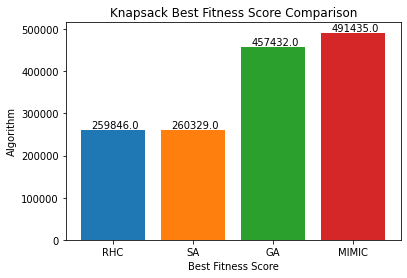

In [69]:
# Plot best fitness
algorithms = [
    ("RHC", rhc_best_fitness),
    ("SA", sa_best_fitness),
    ("GA", ga_best_fitness),
    ("MIMIC", m_best_fitness),
]

plt.figure()

for label, score in algorithms:
    plt.bar(label, score, label=label)
    plt.annotate(score, (label, score), textcoords="offset points", xytext=(-22,2))

plt.xlabel("Best Fitness Score")
plt.ylabel("Algorithm")
plt.title(f"Knapsack Best Fitness Score Comparison")
filename = f"knapsack-best-fitness.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()

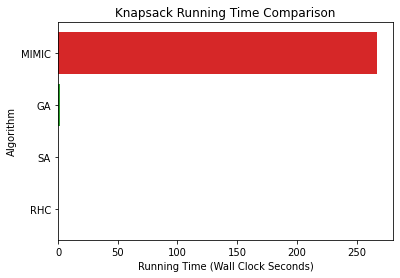

In [65]:
# Plot running times
algorithms = [
    ("RHC", rhc_time),
    ("SA", sa_time),
    ("GA", ga_time),
    ("MIMIC", m_time),
]

plt.figure()

for label, time in algorithms:
    plt.barh(label, time, label=label)

plt.xlabel("Running Time (Wall Clock Seconds)")
plt.ylabel("Algorithm")
plt.title(f"Knapsack Running Time Comparison")
filename = f"knapsack2-time.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()
